In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/c5/98/6fd94db428a9670d638d4469cedfea51671de0126b8f50de1b06e2245c97/yfinance-0.2.50-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     - ----------------------------------- 30.7/948.2 kB 660.6 kB/s eta 0:00:02
     --------- ---------------------------- 245.8/948.2 kB 3.7 MB/s eta 0:00:01
     -------------------------------------  931.8/948.2 kB 7.4 MB/s eta 0:00:01
     -------------------------------------- 948.2/

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [6]:


# Create a ticker object for Tesla using the Ticker function
tesla = yf.Ticker("TSLA")

# Extract stock data using the history function with period set to "max"
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame and display the first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:


# Part 1: Use yfinance to extract stock data for Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")  # Reset index and display the first 5 rows
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data:")
print(tesla_data.head())  # Display first 5 rows of Tesla stock data

# Part 2: Use requests and BeautifulSoup to extract Tesla Revenue Data from the webpage
# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text

# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 4: Extract the table containing Tesla Revenue data
table = soup.find('table')

# Step 5: Convert the table to a pandas dataframe
tesla_revenue = pd.read_html(str(table))[0]

# Check the column names and inspect the structure
print("Tesla Revenue Data (Columns):")
print(tesla_revenue.columns)  # Display the columns to check for 'Revenue' column

# Strip any leading/trailing spaces from the column names
tesla_revenue.columns = tesla_revenue.columns.str.strip()

# Step 6: Check if the 'Revenue' column exists and clean it
# Check if 'Revenue' is in the column names
if 'Revenue' in tesla_revenue.columns:
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    # Remove null or empty strings in the Revenue column
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].notna()]
else:
    print("The 'Revenue' column is not found.")

# Step 7: Display the cleaned revenue data
print("Tesla Revenue Data (Last 5 rows):")
print(tesla_revenue.tail())  # Display the last 5 rows of Tesla revenue data


Tesla Stock Data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  
Tesla Revenue Data (Columns):
Index(['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1'], dtype='object')
The 'Revenue' column is not found.
Tesla Revenue Data (Last 5 rows):
    Tesla Annual Revenue (Millions of US $)  \
8                                      2013   
9         

In [8]:
# Create a ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Extract stock data using the history function with period set to "max"
gamestop_data = gamestop.history(period="max")

# Reset the index and display the first 5 rows of the stock data
gamestop_data.reset_index(inplace=True)
print("GameStop Stock Data:")
print(gamestop_data.head())  # Display first 5 rows of GameStop stock data

GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [13]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Step 3: Parse the HTML data using BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

# Step 4: Extract the table containing GameStop Revenue data
table_2 = soup_2.find('table')

# Step 5: Convert the table to a pandas dataframe
gme_revenue = pd.read_html(str(table_2))[0]

# Check the columns to see what they are
print("Columns in the extracted table:")
print(gme_revenue.columns)

# Clean the column names (strip spaces)
gme_revenue.columns = gme_revenue.columns.str.strip()

# Check again to see if 'Revenue' column exists now
print("Cleaned Columns in the extracted table:")
print(gme_revenue.columns)

# Step 6: Clean the 'Revenue' column if it exists
if 'Revenue' in gme_revenue.columns:
    # Remove dollar signs and commas, then convert to float
    gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
else:
    print("The 'Revenue' column is not found.")

# Display the last 5 rows of the gme_revenue dataframe
print("Last 5 rows of the cleaned GameStop revenue data:")
print(gme_revenue.tail())


Columns in the extracted table:
Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
Cleaned Columns in the extracted table:
Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
The 'Revenue' column is not found.
Last 5 rows of the cleaned GameStop revenue data:
    GameStop Annual Revenue (Millions of US $)  \
11                                        2009   
12                                        2008   
13                                        2007   
14                                        2006   
15                                        2005   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,806  
12                                       $7,094  
13                                       $5,319  
14                                       $3,092  
15                                       $1,843  


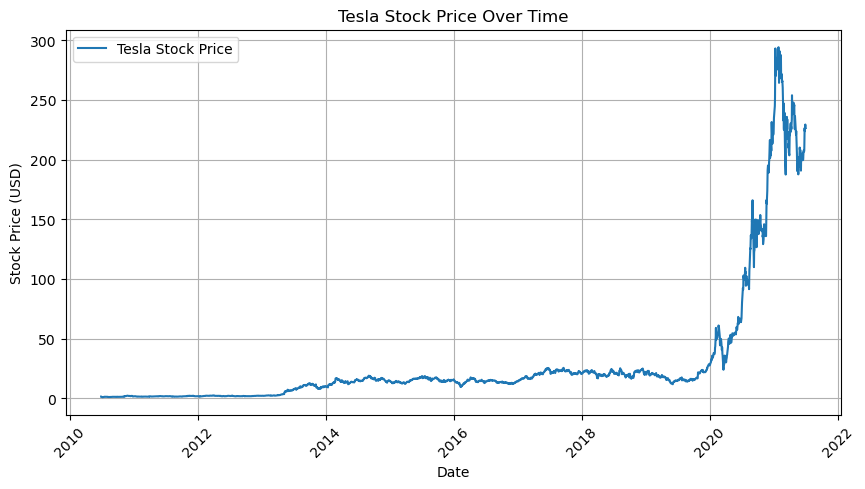

In [15]:
import matplotlib.pyplot as plt

# Function to plot the stock data
def make_graph(stock_data, stock_revenue, title):
    # Filter data until June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    
    # Plot the stock data
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{title} Stock Price')
    plt.title(f'{title} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function for Tesla
make_graph(tesla_data, None, 'Tesla')


Columns in the extracted table:
Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
Cleaned Columns:
Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
The 'Revenue' column is not found.


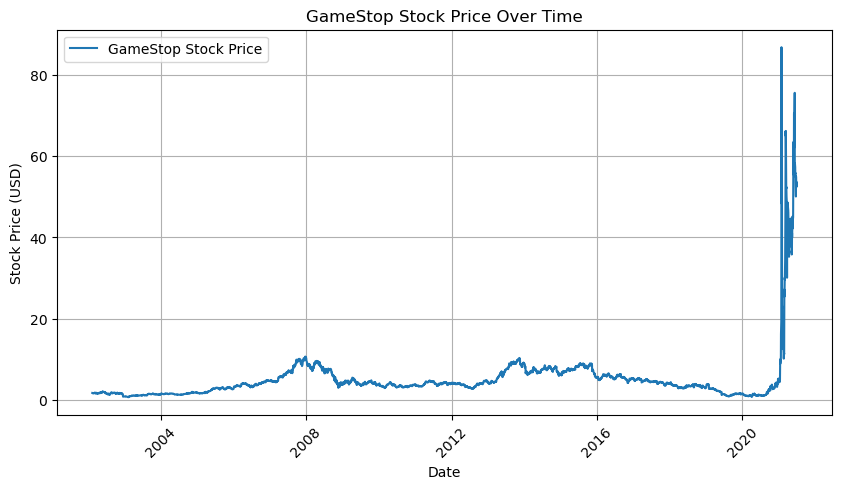

In [17]:
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to plot the stock data
def make_graph(stock_data, stock_revenue, title):
    # Filter data until June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    
    # Plot the stock data
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{title} Stock Price')
    plt.title(f'{title} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Extract GameStop stock data using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Use requests and BeautifulSoup to extract GameStop Revenue Data
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)
html_data_2 = response_2.text
soup_2 = BeautifulSoup(html_data_2, 'html.parser')
table_2 = soup_2.find('table')
gme_revenue = pd.read_html(str(table_2))[0]

# Debugging: Print columns to check the actual column names
print("Columns in the extracted table:")
print(gme_revenue.columns)

# Clean the column names (strip spaces)
gme_revenue.columns = gme_revenue.columns.str.strip()

# Check if 'Revenue' column exists after cleaning
print("Cleaned Columns:")
print(gme_revenue.columns)

# If 'Revenue' exists, clean it and convert to float
if 'Revenue' in gme_revenue.columns:
    gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
else:
    print("The 'Revenue' column is not found.")

# Plot GameStop Stock Graph
make_graph(gme_data, gme_revenue, 'GameStop')
